In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))



Logistic Regression Accuracy:  0.9736842105263158


In [38]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred))



SVM Accuracy:  0.9736842105263158


In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("k-NN Accuracy: ", accuracy_score(y_test, y_pred))



k-NN Accuracy:  0.9473684210526315


In [40]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred))


Decision Tree Accuracy:  0.9385964912280702


In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))


Random Forest Accuracy:  0.956140350877193


In [42]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred))



Naive Bayes Accuracy:  0.9649122807017544


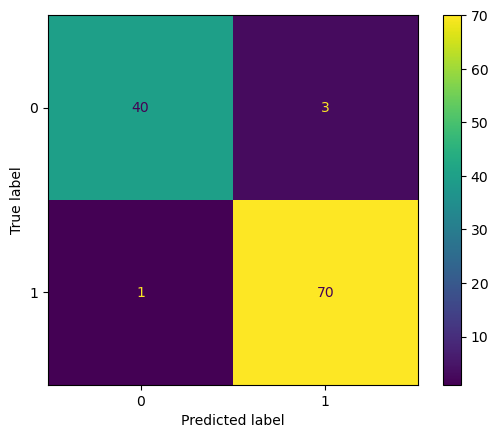

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



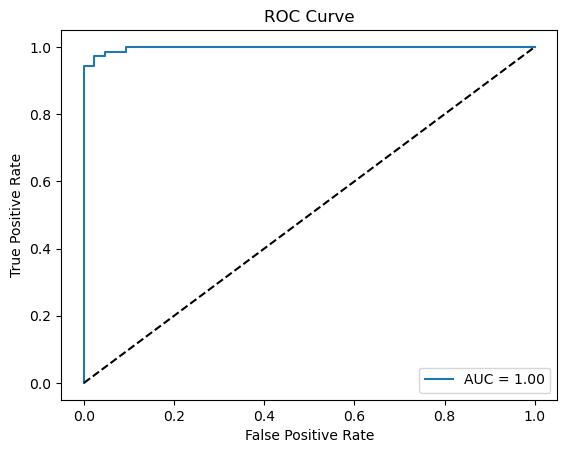

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming a binary classification problem
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


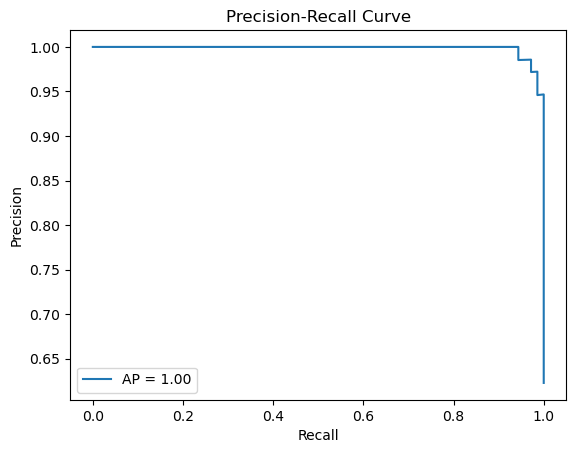

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, label=f"AP = {average_precision_score(y_test, y_prob):.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()



In [46]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



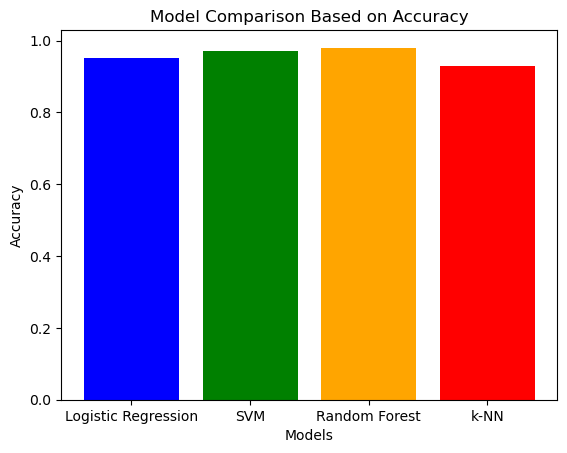

In [47]:
import matplotlib.pyplot as plt

# Store results for each algorithm
models = ["Logistic Regression", "SVM", "Random Forest", "k-NN"]
accuracies = [0.95, 0.97, 0.98, 0.93]  # Replace these with your actual accuracy results

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison Based on Accuracy")
plt.show()



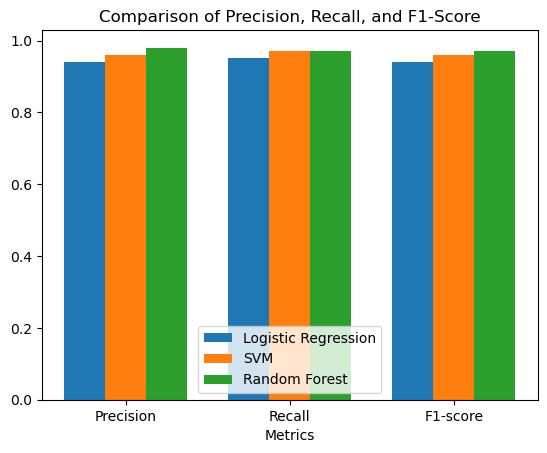

In [48]:
import numpy as np

# Example metrics (replace with actual results)
metrics = ['Precision', 'Recall', 'F1-score']
log_reg = [0.94, 0.95, 0.94]
svm = [0.96, 0.97, 0.96]
rf = [0.98, 0.97, 0.97]

# Plot
x = np.arange(len(metrics))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
ax.bar(x - width, log_reg, width, label='Logistic Regression')
ax.bar(x, svm, width, label='SVM')
ax.bar(x + width, rf, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


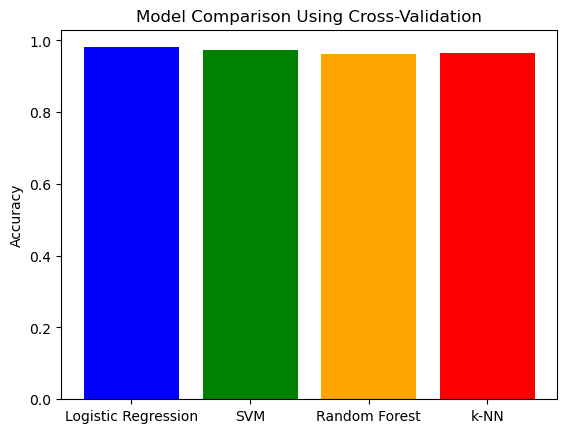

In [49]:
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(), 
    SVC(), 
    RandomForestClassifier(), 
    KNeighborsClassifier()
]
model_names = ["Logistic Regression", "SVM", "Random Forest", "k-NN"]

accuracies = []
for model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    accuracies.append(cv_scores.mean())

plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison Using Cross-Validation')
plt.show()


C:\Users\Tharun\AppData\Local\Temp\ipykernel_6768\3797402028.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


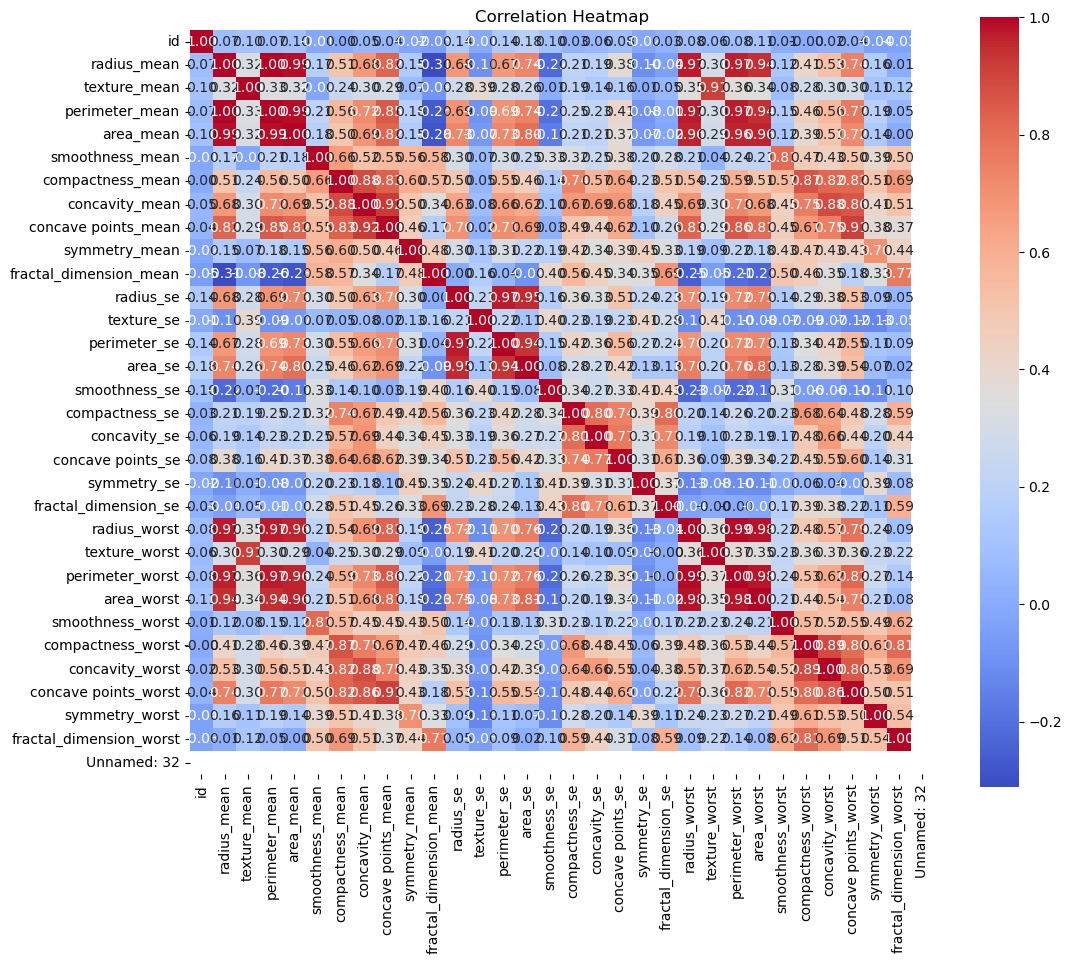

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()
